In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

In [67]:
# import datasets
iris = datasets.load_iris()
data = iris['data']
target = iris['target']

# split dataset into train and test sets
x_train, x_valid, y_train, y_valid = train_test_split(data, target,shuffle=True)

# normalization
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)

x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_valid = torch.from_numpy(x_valid).float()
y_valid = torch.from_numpy(y_valid).long()
# torch.long: 64-bit signed integer

print("x_train: {}".format(x_train.shape))
print("y_train: {}".format(y_train.shape))
print("x_valid: {}".format(x_valid.shape))
print("y_valid: {}".format(y_valid.shape))

x_train: torch.Size([112, 4])
y_train: torch.Size([112])
x_valid: torch.Size([38, 4])
y_valid: torch.Size([38])


In [68]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(x_train, y_train)
valid_dataset = TensorDataset(x_valid, y_valid)

In [69]:
from torch.utils.data import DataLoader

batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)

In [70]:
# define network
from model import Net

net = Net()

In [71]:
# define loss function
import torch.nn as nn

criterion = nn.CrossEntropyLoss()

In [72]:
# define optimization method
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

In [73]:
# training
num_epoch = 50
dataloaders_dict = {
    "train": train_dataloader, 
    "val": valid_dataloader
}

losses = []
accs = []

for epoch in range(num_epoch):
    print("Epoch {}/{}".format(epoch+1, num_epoch))
    print("")

    for phase in ["train", "val"]:
        if (phase == "train"):
            net.train()

        else:
            net.eval()

        epoch_loss = 0.0
        epoch_corrects = 0

        for inputs, labels in dataloaders_dict[phase]:
            optimizer.zero_grad()
            with torch.set_grad_enabled(phase=="train"):
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)

                if (phase=="train"):
                    loss.backward()
                    optimizer.step()
                
                epoch_loss += loss.item() * inputs.size(0)
                epoch_corrects += torch.sum(preds==labels.data)
        
        epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
        epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)

        if (phase=="train"):
            losses.append(epoch_loss)
        if (phase=="val"):
            accs.append(epoch_acc)

        print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

Epoch 1/50

train Loss: 1.0697 Acc: 0.3661
val Loss: 1.0394 Acc: 0.4737
Epoch 2/50

train Loss: 1.0651 Acc: 0.3661
val Loss: 1.0328 Acc: 0.4737
Epoch 3/50

train Loss: 1.0606 Acc: 0.3661
val Loss: 1.0274 Acc: 0.4737
Epoch 4/50

train Loss: 1.0563 Acc: 0.3661
val Loss: 1.0212 Acc: 0.4737
Epoch 5/50

train Loss: 1.0519 Acc: 0.3661
val Loss: 1.0153 Acc: 0.4737
Epoch 6/50

train Loss: 1.0477 Acc: 0.3661
val Loss: 1.0100 Acc: 0.4737
Epoch 7/50

train Loss: 1.0438 Acc: 0.3750
val Loss: 1.0046 Acc: 0.4737
Epoch 8/50

train Loss: 1.0399 Acc: 0.3750
val Loss: 0.9994 Acc: 0.4737
Epoch 9/50

train Loss: 1.0361 Acc: 0.3839
val Loss: 0.9946 Acc: 0.4737
Epoch 10/50

train Loss: 1.0324 Acc: 0.3839
val Loss: 0.9898 Acc: 0.4737
Epoch 11/50

train Loss: 1.0290 Acc: 0.3929
val Loss: 0.9848 Acc: 0.4737
Epoch 12/50

train Loss: 1.0252 Acc: 0.4018
val Loss: 0.9800 Acc: 0.4737
Epoch 13/50

train Loss: 1.0217 Acc: 0.3929
val Loss: 0.9758 Acc: 0.4737
Epoch 14/50

train Loss: 1.0184 Acc: 0.4018
val Loss: 0.9717

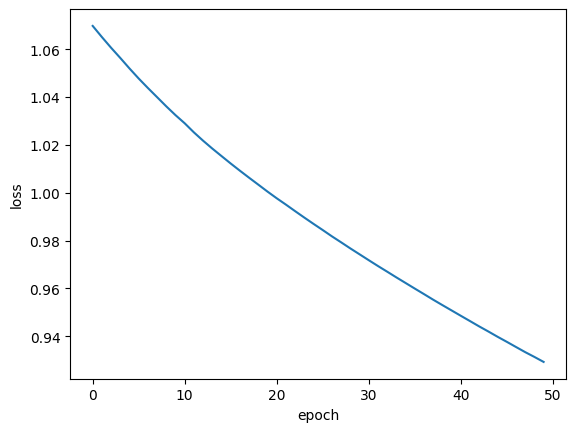

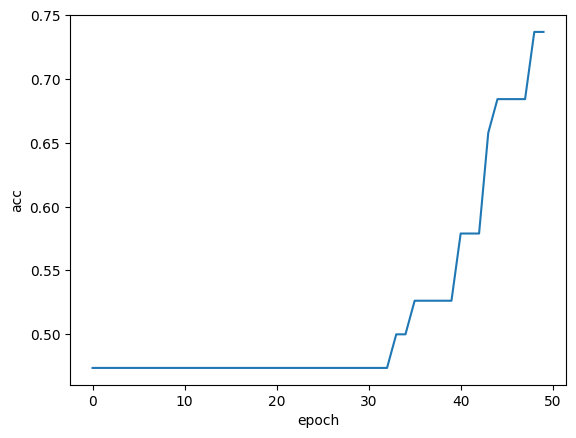

In [74]:
fig = plt.figure()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(losses)
plt.show()

fig = plt.figure()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.plot(accs)
plt.show()